# 7 Day Simulation Visualization

- Days : 25
- llm : llama3
- Agent : 20
- Posts : 322
- Like : 24
- Comments : 30 (~ 1 per post)

In [1]:
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<h4> Exploring the data

In [2]:
# Connect to the database
conn = sqlite3.connect('../YClient/experiments/25-days-simulation.db')
c = conn.cursor()
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('sqlite_sequence',), ('hashtags',), ('post_hashtags',), ('mentions',), ('emotions',), ('post_emotions',), ('rounds',), ('follow',), ('reactions',), ('websites',), ('articles',), ('post',), ('recommendations',), ('voting',), ('user_interest',), ('interests',), ('post_topics',), ('user_mgmt',)]


In [3]:
# for each table, get the columns
tables = ['sqlite_sequence', 'hashtags', 'post_hashtags', 'mentions', 'emotions', 'post_emotions', 'rounds', 'follow', 'reactions', 'websites', 'articles', 'post', 'recommendations', 'voting', 'user_interest', 'interests', 'post_topics', 'user_mgmt']
for table in tables:
    print(table)
    c.execute("PRAGMA table_info(" + table +")")
    print(c.fetchall())

sqlite_sequence
[(0, 'name', '', 0, None, 0), (1, 'seq', '', 0, None, 0)]
hashtags
[(0, 'hashtag', 'TEXT', 1, None, 0), (1, 'id', 'INTEGER', 0, None, 1)]
post_hashtags
[(0, 'post_id', 'INTEGER', 0, None, 0), (1, 'hashtag_id', 'INTEGER', 0, None, 0), (2, 'id', 'INTEGER', 1, None, 1)]
mentions
[(0, 'id', 'INTEGER', 0, None, 1), (1, 'user_id', 'INT', 0, None, 0), (2, 'post_id', 'INTEGER', 0, None, 0), (3, 'round', 'INTEGER', 0, None, 0), (4, 'answered', 'INTEGER', 0, '0', 0)]
emotions
[(0, 'id', 'INTEGER', 1, None, 1), (1, 'emotion', 'TEXT', 1, None, 0)]
post_emotions
[(0, 'id', 'INTEGER', 0, None, 1), (1, 'post_id', 'INTEGER', 0, None, 0), (2, 'emotion_id', 'INTEGER', 0, None, 0)]
rounds
[(0, 'id', 'INTEGER', 1, None, 1), (1, 'day', 'INTEGER', 0, None, 0), (2, 'hour', 'INTEGER', 0, None, 0)]
follow
[(0, 'user_id', 'INTEGER', 1, None, 0), (1, 'follower_id', 'INTEGER', 1, None, 0), (2, 'id', 'INTEGER', 1, None, 1), (3, 'action', 'TEXT', 0, None, 0), (4, 'round', 'INTEGER', 0, None, 0)]
rea

<h4>Users

In [4]:
users_df = pd.read_sql_query("SELECT id, username FROM user_mgmt", conn)
users_df

,id,username
0,18,BrentWest
1,9,Emmanuel-ThibaultPerez
2,2,GabrielVerdier
3,13,HenrietteBertrand
4,4,HenriettePrévost-Simon
5,16,JaniceNguyen
6,5,JeffreyAlvarado
7,17,JenniferMccoy
8,7,JenniferMontoya
9,15,JohnGarcia


Initially, the simulation began with 20 agents.

<h4>Posts

In [5]:
posts_df = pd.read_sql_query("SELECT * FROM post", conn)
posts_df

,id,tweet,post_img,user_id,comment_to,thread_id,round,news_id,shared_from
0,1,"At 79, I've lived through many campaigns! Ther...",None,16,-1,1,12,NaN,-1
1,2,Very well articulated! Democracy truly has st...,None,5,1,1,14,NaN,-1
2,3,While I agree about our democracy's foundatio...,None,13,2,1,16,NaN,-1
3,4,Thanks for sharing your thoughts! It's always...,None,16,2,1,19,NaN,-1
4,5,"Yes, breaking the process down into tangible ...",None,1,3,1,20,NaN,-1
...,...,...,...,...,...,...,...,...,...
317,318,"friendly technologies, creating programs for s...",None,17,316,316,604,NaN,-1
318,319,Being French and a part of the independent dem...,None,13,-1,319,606,NaN,-1
319,320,Agriculture plays such an important role in ou...,None,13,-1,320,606,NaN,-1
320,321,As an Independent young adult interested in el...,None,9,-1,321,607,NaN,-1


In [6]:
# show content of some posts_df
for index, row in posts_df.iterrows():
    print(row['tweet'])
    print('---')

At 79, I've lived through many campaigns! There's nothing better than casting my vote for change ☀️.As an independent, my support relies on clear messages for a brighter tomorrow 🔍 #FreeThought #VeteranVoice  🗳️🙋‍♀️💚
---
 Very well articulated! Democracy truly has strength when we see everyone's perspectives and voice 🊕♻️ Let's raise the bar with a commitment for transparency in our upcoming elections together ❤️🇺🇸

##CONVERSATION END ##
---
 While I agree about our democracy's foundation upon diverse opinions engagement 🙌∘, would appreciate more your suggestions regarding clear campaign messages as an independent and committed supporter🧐💡.

---
 Thanks for sharing your thoughts! It's always helpful to look for actionable steps towards making positive change ⛔💚 Let's use these engaging exchanges in forums like these as the beginning of moving forward on issues important to us ❤️ 
 


---
 Yes, breaking the process down into tangible goal sets helps create achievable approaches @Jeffrey

Total number of posts is 100

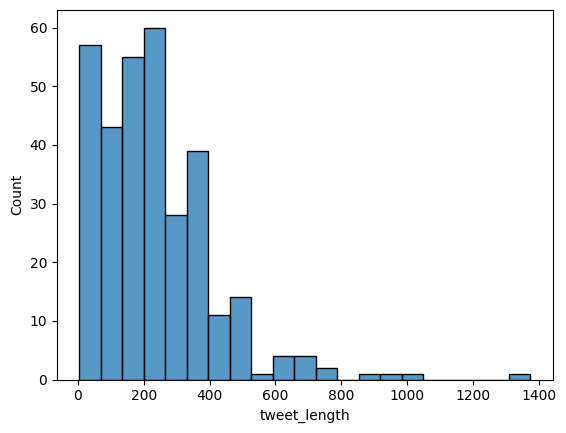

count     322.000000
mean      231.332298
std       180.147840
min         5.000000
25%        98.500000
50%       212.500000
75%       322.750000
max      1374.000000
Name: tweet_length, dtype: float64

In [7]:
# plot the length of the tweets
posts_df['tweet_length'] = posts_df['tweet'].apply(len)
sns.histplot(posts_df['tweet_length'])
plt.show()

posts_df['tweet_length'].describe()

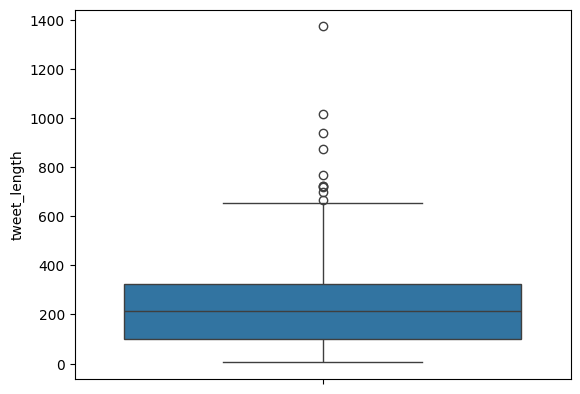

In [8]:
# boxplot
sns.boxplot(posts_df['tweet_length'])
plt.show()

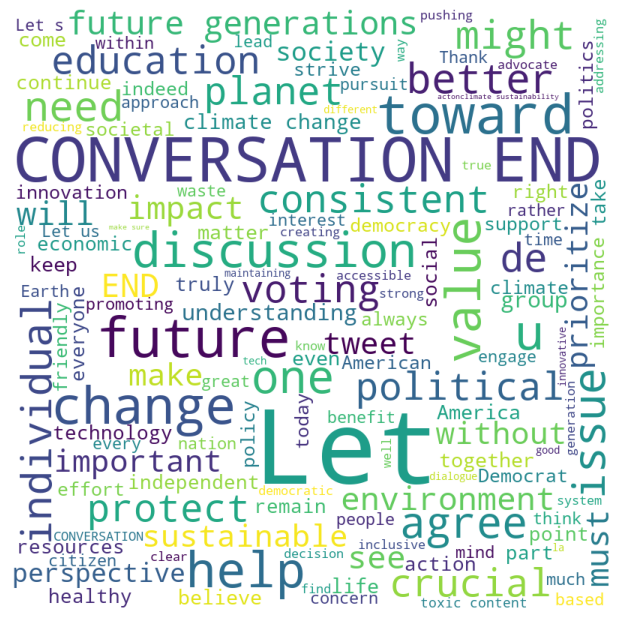

In [9]:
# cloud of words for the tweets
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(posts_df['tweet']))
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [10]:
# count comments for each post
comments_query = """
SELECT
    p.id AS post_id,
    COUNT(c.id) AS comment_count
FROM
    post p
LEFT JOIN
    post c ON p.id = c.comment_to
GROUP BY
    p.id
ORDER BY
    comment_count DESC;
"""

comments_df = pd.read_sql_query(comments_query, conn)

# show all the rows in the dataframe
comments_df

,post_id,comment_count
0,203,6
1,98,3
2,127,3
3,157,3
4,2,2
...,...,...
317,317,0
318,318,0
319,319,0
320,321,0


In [11]:
# count total number of comments
comments_df['comment_count'].sum()

140

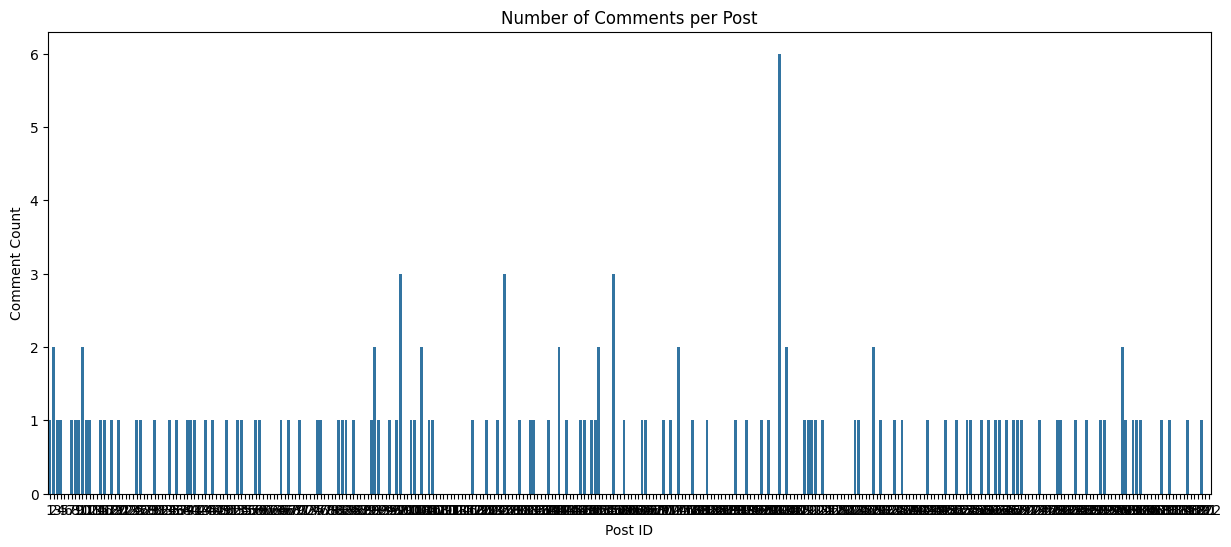

In [12]:
# plot the number of comments per post
blue_color = sns.color_palette()[0]
plt.figure(figsize=(15, 6))
sns.barplot(data=comments_df, x='post_id', y='comment_count', color=blue_color)

plt.title("Number of Comments per Post")
plt.xlabel("Post ID")
plt.ylabel("Comment Count")
plt.show()

Only a few posts have comments, while the majority remain without any, indicating a low level of interaction between the agents.
However the result are better then 1 day simulation

In [13]:
# Query for mentions 
mentions_query = """
    SELECT m.user_id, r.day, r.hour
    FROM mentions m
    JOIN rounds r ON m.round = r.id
"""
mentions_df = pd.read_sql(mentions_query, conn)

# Similarly, fetch other interaction data (follow, post, comment)
follow_query = """
    SELECT f.user_id, r.day, r.hour
    FROM follow f
    JOIN rounds r ON f.round = r.id
"""
follow_df = pd.read_sql(follow_query, conn)

post_query = """
    SELECT p.user_id, r.day, r.hour
    FROM post p
    JOIN rounds r ON p.round = r.id
"""
post_df = pd.read_sql(post_query, conn)

# Combine all interactions into one dataframe
mentions_df['interaction_type'] = 'mention'
follow_df['interaction_type'] = 'follow'
post_df['interaction_type'] = 'post'

# Concatenate all interaction dataframes
interaction_df = pd.concat([mentions_df, follow_df, post_df])


interaction_df['day'] = interaction_df['day'].apply(lambda x: 1 if x == 0 else x)  

# combine day and hour to create a timestamp
interaction_df['timestamp'] = pd.to_datetime(interaction_df['day'].astype(str) + '-' + interaction_df['hour'].astype(str), format='%j-%H')

# Count interactions by user and hour
interaction_df['hour'] = interaction_df['timestamp'].dt.hour
interaction_count = interaction_df.groupby(['user_id', 'interaction_type', 'hour']).size().reset_index(name='interaction_count')

interaction_count

,user_id,interaction_type,hour,interaction_count
0,1,follow,0,1
1,1,follow,9,1
2,1,follow,12,1
3,1,follow,23,1
4,1,mention,13,1
...,...,...,...,...
266,20,post,15,1
267,20,post,17,1
268,20,post,20,3
269,20,post,22,1


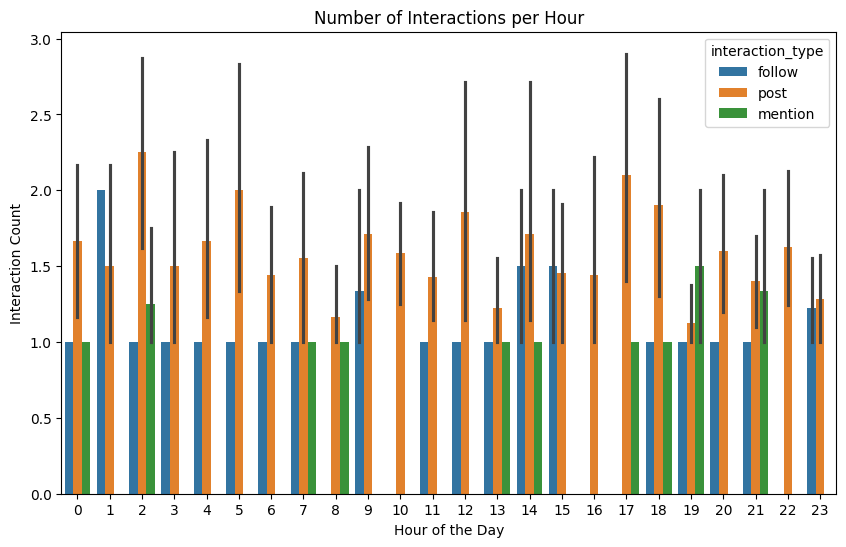

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=interaction_count, x='hour', y='interaction_count', hue='interaction_type')
plt.title("Number of Interactions per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Interaction Count")
plt.show()

The results show diverse activity times and low posting behavio - 7 day simulation :'(

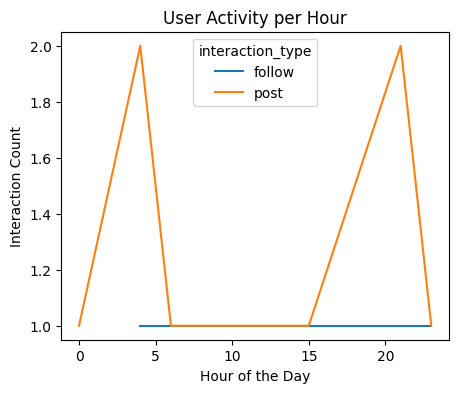

In [15]:
# for one user plot a line of his activity during the simulation
def plot_user_activity(user_id, interaction_count):
    user_activity = interaction_count[interaction_count['user_id'] == user_id]

    plt.figure(figsize=(5, 4))
    sns.lineplot(data=user_activity, x='hour', y='interaction_count', hue='interaction_type')
    plt.title("User Activity per Hour")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Interaction Count")
    plt.show()
    
plot_user_activity(4, interaction_count)


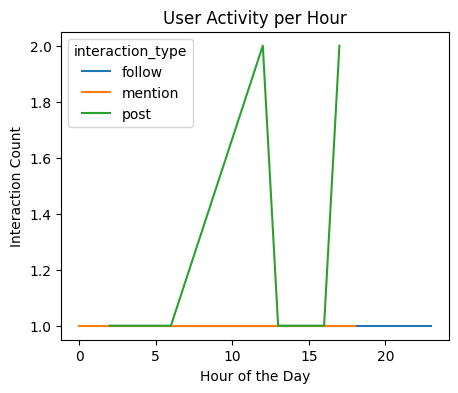

In [16]:
plot_user_activity(5, interaction_count)

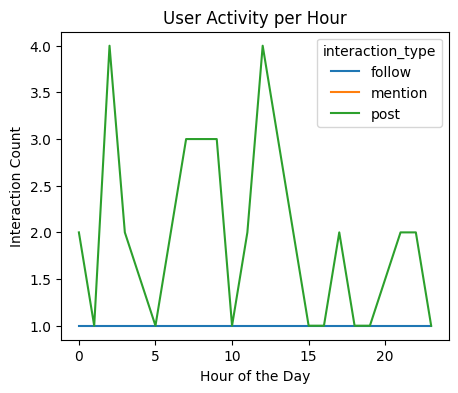

In [17]:
plot_user_activity(1, interaction_count)

<h4>Graph of interactions

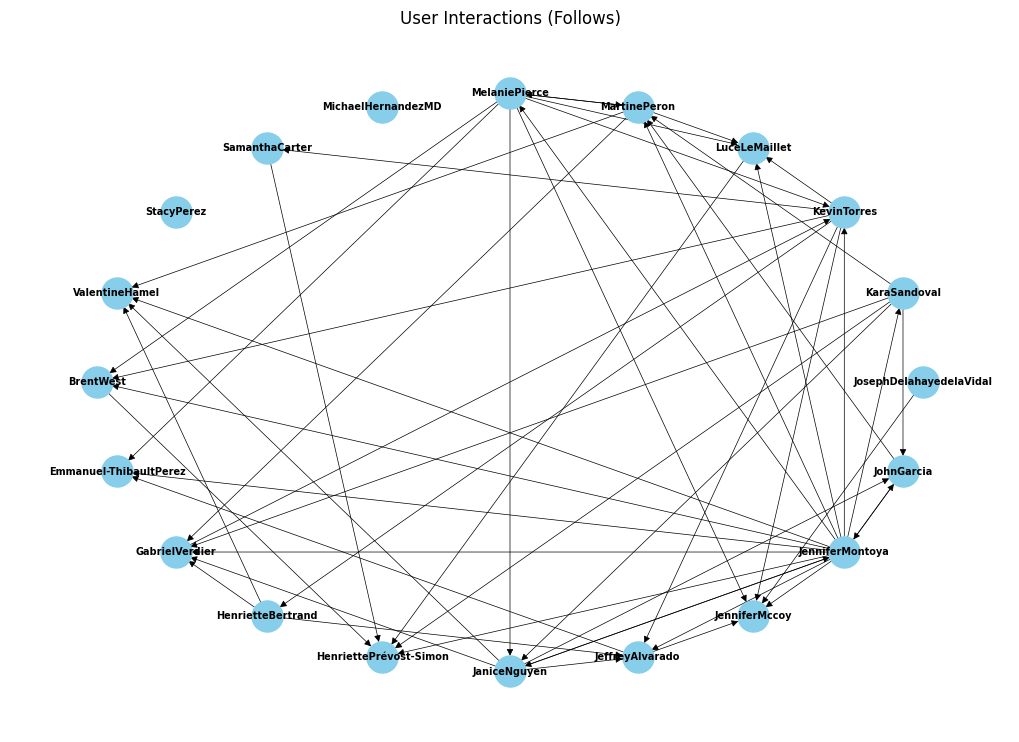

In [18]:
# Fetch follow interactions
follow_query = "SELECT follower_id, user_id FROM follow"
follow_df = pd.read_sql_query(follow_query, conn)

mention_query = "SELECT user_id AS mentioner_id, post_id AS mentioned_id FROM mentions"
mention_df = pd.read_sql_query(mention_query, conn)

users_query = "SELECT id, username FROM user_mgmt"
users_df = pd.read_sql_query(users_query, conn)

user_name_map = dict(zip(users_df['id'], users_df['username']))

# Initialize directed graph
G = nx.DiGraph()

# Add all users as nodes 
for user_id, username in user_name_map.items():
    G.add_node(user_id, label=username)

# Add follow interactions as edges
for _, row in follow_df.iterrows():
    G.add_edge(row['follower_id'], row['user_id'], type='follow')



# Plot the graph
plt.figure(figsize=(10, 7))
pos = nx.shell_layout(G)

labels = {node: user_name_map.get(node, node) for node in G.nodes()}

nx.draw(
    G, pos, with_labels=True, labels=labels, node_size=500, node_color="skyblue", font_size=7, font_weight="bold", edge_color="black", width=0.5
)

edge_labels = nx.get_edge_attributes(G, 'type')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("User Interactions (Follows)")
plt.show()
#nx.clustering(G)



Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'leidenalg', 'wurlitzer', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'infomap', 'wurlitzer'}


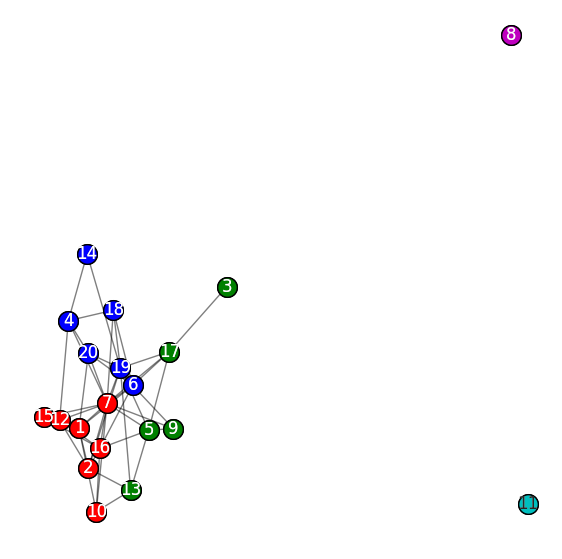

In [19]:
import cdlib
import networkx as nx
from cdlib import algorithms, viz

# Convert the graph to networkx format
G_nx = nx.Graph(G)

# Apply the Louvain algorithm
louvain_communities = algorithms.louvain(G_nx)

# Plot the network clusters
viz.plot_network_clusters(G_nx, louvain_communities, figsize=(7, 7), plot_labels=True)




see for each round

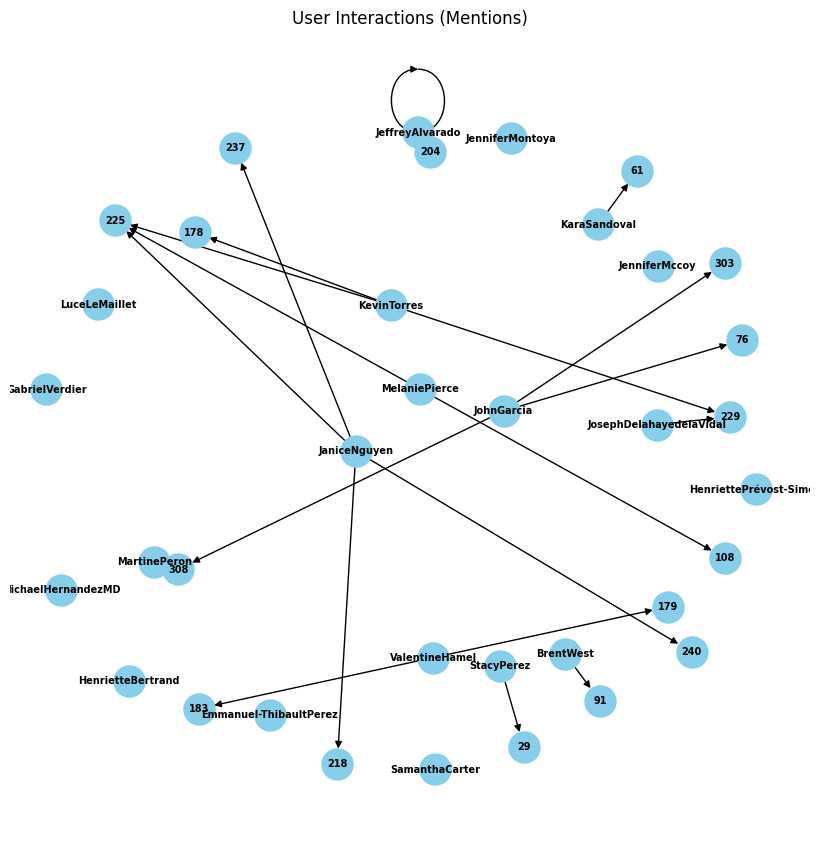

In [20]:
# Fetch follow interactions
follow_query = "SELECT follower_id, user_id FROM follow"
follow_df = pd.read_sql_query(follow_query, conn)

mention_query = "SELECT user_id AS mentioner_id, post_id AS mentioned_id FROM mentions"
mention_df = pd.read_sql_query(mention_query, conn)

users_query = "SELECT id, username FROM user_mgmt"
users_df = pd.read_sql_query(users_query, conn)

user_name_map = dict(zip(users_df['id'], users_df['username']))

# Initialize directed graph
G = nx.DiGraph()

# Add all users as nodes 
for user_id, username in user_name_map.items():
    G.add_node(user_id, label=username)


# Add mention interactions as edges
if not mention_df.empty:
    for _, row in mention_df.iterrows():
        G.add_edge(row['mentioner_id'], row['mentioned_id'], type='mention')

# Plot the graph
plt.figure(figsize=(8, 8))
  
#  forceatlas2 
pos = nx.rescale_layout_dict(nx.spring_layout(G), scale=1)

labels = {node: user_name_map.get(node, node) for node in G.nodes()}

nx.draw(
    G, pos, with_labels=True, labels=labels, node_size=500, node_color="skyblue", font_size=7, font_weight="bold"
)

edge_labels = nx.get_edge_attributes(G, 'type')

plt.title("User Interactions (Mentions)")
plt.show()


In [21]:
mention_df.head()

,mentioner_id,mentioned_id
0,5,5
1,8,29
2,8,29
3,12,61
4,15,76


Where there is a node with a number, it means that the person mentions himself in the post with the number as id.


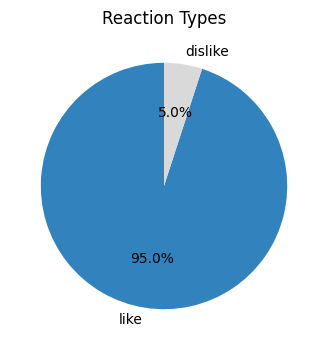

In [22]:
reactions_df = pd.read_sql_query("SELECT * FROM reactions", conn)

reaction_counts = reactions_df['type'].value_counts()

plt.figure(figsize=(4, 4))
reaction_counts.plot.pie(
    autopct='%1.1f%%', startangle=90, title="Reaction Types", cmap='tab20c'
)
plt.ylabel("")  
plt.show()


In [23]:
# total number of reactions
total_reactions = reaction_counts.sum()
total_reactions 

20

<h4> Number of of followers and followees for each user

In [24]:
follow_query = "SELECT follower_id, user_id FROM follow"
follow_df = pd.read_sql_query(follow_query, conn)

# Rename 'id' to 'user_id' in users_df to match other DataFrames
users_df.rename(columns={"id": "user_id"}, inplace=True)

# Count followers
followers_count = follow_df.groupby('user_id').size().reset_index(name='followers_count')

# Count followees
followees_count = follow_df.groupby('follower_id').size().reset_index(name='followees_count')

# Merge counts with all users to include everyone
user_counts = (
    users_df
    .merge(followers_count, on='user_id', how='left')  
    .merge(followees_count, left_on='user_id', right_on='follower_id', how='left')  # Match on 'follower_id'
    .drop(columns=['follower_id'])  
)

user_counts['followers_count'] = user_counts['followers_count'].fillna(0).astype(int)
user_counts['followees_count'] = user_counts['followees_count'].fillna(0).astype(int)

user_counts

,user_id,username,followers_count,followees_count
0,18,BrentWest,3,1
1,9,Emmanuel-ThibaultPerez,3,0
2,2,GabrielVerdier,5,1
3,13,HenrietteBertrand,1,3
4,4,HenriettePrévost-Simon,5,0
5,16,JaniceNguyen,3,5
6,5,JeffreyAlvarado,4,2
7,17,JenniferMccoy,5,0
8,7,JenniferMontoya,2,14
9,15,JohnGarcia,3,2


<h4>Number pf posts per user

In [25]:
user_posts = post_df['user_id'].value_counts().reset_index()
user_posts.columns = ['user_id', 'posts']
user_posts

,user_id,posts
0,16,36
1,1,34
2,6,31
3,12,27
4,19,20
5,2,19
6,13,19
7,8,19
8,7,16
9,9,16


<h4>Given nd received reaction per user

In [26]:
reactions_df = pd.read_sql_query("SELECT * FROM reactions", conn)

# Count reactions given by each user
user_reactions_given = reactions_df['user_id'].value_counts().reset_index()
user_reactions_given.columns = ['user_id', 'reactions_given']

# Count reactions received by each user
post_reactions = reactions_df['post_id'].value_counts().reset_index()
post_reactions.columns = ['post_id', 'reactions_received']

# Merge post_reactions with post_df to get the user_id of the post owner
user_reactions_received = pd.merge(post_reactions, posts_df[['id', 'user_id']], left_on='post_id', right_on='id')
user_reactions_received = user_reactions_received.groupby('user_id')['reactions_received'].sum().reset_index()

# Merge with users_df to include all users
user_reactions = pd.merge(users_df[['user_id']], user_reactions_given, on='user_id', how='left').fillna(0)
user_reactions = pd.merge(user_reactions, user_reactions_received, on='user_id', how='left').fillna(0)
user_reactions

,user_id,reactions_given,reactions_received
0,18,0.0,1.0
1,9,2.0,1.0
2,2,4.0,3.0
3,13,0.0,1.0
4,4,0.0,0.0
5,16,4.0,1.0
6,5,0.0,1.0
7,17,1.0,1.0
8,7,0.0,0.0
9,15,1.0,0.0


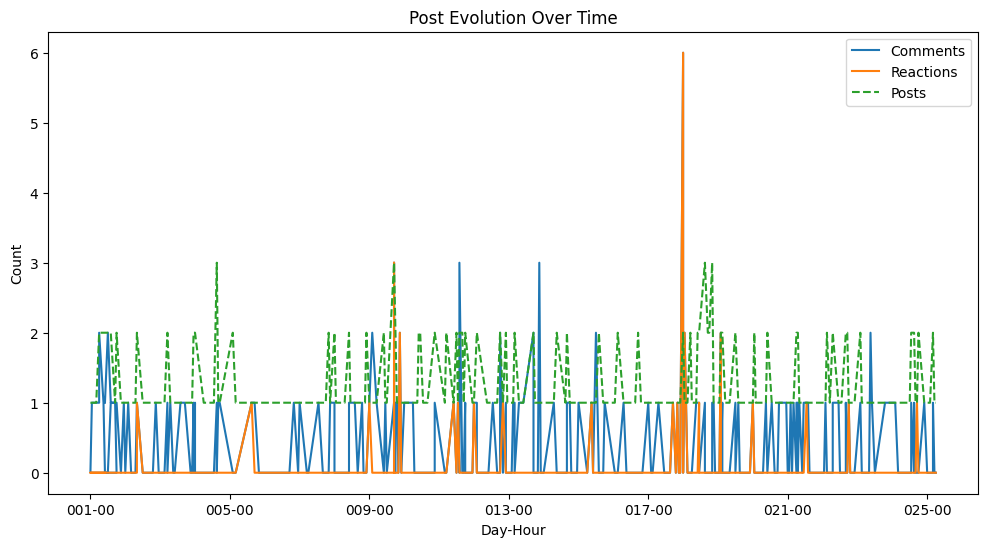

In [27]:
# track the evolusion of a post over time ( new comment , new comments, new reactions)
post_evolution_query = """
SELECT
    p.id AS post_id,
    r.day,
    r.hour,
    COUNT(c.id) AS comment_count,
    COUNT(r2.id) AS reaction_count
FROM
    post p
JOIN
    rounds r ON p.round = r.id
LEFT JOIN
    post c ON p.id = c.comment_to
LEFT JOIN
    reactions r2 ON p.id = r2.post_id
GROUP BY
    p.id, r.day, r.hour
ORDER BY
    r.day, r.hour;
"""

post_evolution_df = pd.read_sql_query(post_evolution_query, conn)
# Assuming post_evolution_df is already populated with the query result
post_evolution_df['day'] = post_evolution_df['day'].apply(lambda x: 1 if x == 0 else x)

# Create the timestamp using only the day and hour
post_evolution_df['timestamp'] = pd.to_datetime(post_evolution_df['day'].astype(str) + '-' + post_evolution_df['hour'].astype(str), format='%j-%H')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(post_evolution_df['timestamp'], post_evolution_df['comment_count'], label='Comments')
plt.plot(post_evolution_df['timestamp'], post_evolution_df['reaction_count'], label='Reactions')
post_counts = post_evolution_df.groupby('timestamp').size()
plt.plot(post_counts.index, post_counts.values, label='Posts', linestyle='--')

# Format the x-axis to show only the day and hour
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%j-%H'))

plt.xlabel("Day-Hour")
plt.ylabel("Count")
plt.title("Post Evolution Over Time")
plt.legend()
plt.show()
 



In [28]:
query = """
SELECT
    p.id AS post_id,
    p.round AS post_creation_round,
    'creation' AS event_type,
    p.round AS event_time,
    NULL AS comment_post_id,
    NULL AS reaction_user_id,
    NULL AS reaction_type,
    NULL AS mention_user_id
FROM post p
UNION
SELECT
    p.id AS post_id,
    p.round AS post_creation_round,
    'comment' AS event_type,
    c.round AS event_time,
    c.id AS comment_post_id,
    NULL AS reaction_user_id,
    NULL AS reaction_type,
    NULL AS mention_user_id
FROM post p
LEFT JOIN post c ON c.comment_to = p.id
UNION
SELECT
    p.id AS post_id,
    p.round AS post_creation_round,
    'reaction' AS event_type,
    r.round AS event_time,
    r.post_id AS comment_post_id,
    r.user_id AS reaction_user_id,
    r.type AS reaction_type,
    NULL AS mention_user_id
FROM post p
LEFT JOIN reactions r ON r.post_id = p.id
UNION
SELECT
    p.id AS post_id,
    p.round AS post_creation_round,
    'mention' AS event_type,
    m.round AS event_time,
    m.post_id AS comment_post_id,
    NULL AS reaction_user_id,
    NULL AS reaction_type,
    m.user_id AS mention_user_id
FROM post p
LEFT JOIN mentions m ON m.post_id = p.id
ORDER BY post_id, event_time;

"""

# Execute the query and fetch the results into a DataFrame
post_evolution_df = pd.read_sql_query(query, conn)

# save the dataframe to a csv file
post_evolution_df.to_csv("post_evolution.csv", index=False)

# Display the result
post_evolution_df



,post_id,post_creation_round,event_type,event_time,comment_post_id,reaction_user_id,reaction_type,mention_user_id
0,1,12,mention,NaN,NaN,NaN,None,NaN
1,1,12,reaction,NaN,NaN,NaN,None,NaN
2,1,12,creation,12.0,NaN,NaN,None,NaN
3,1,12,comment,14.0,2.0,NaN,None,NaN
4,2,14,mention,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...
1308,321,607,creation,607.0,NaN,NaN,None,NaN
1309,322,608,comment,NaN,NaN,NaN,None,NaN
1310,322,608,mention,NaN,NaN,NaN,None,NaN
1311,322,608,reaction,NaN,NaN,NaN,None,NaN


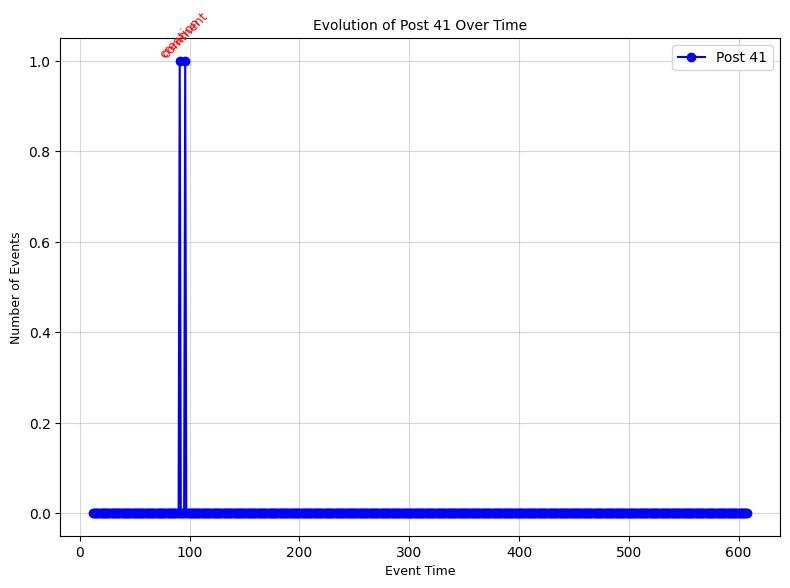

In [ ]:
import numpy as np 

# Load the data
file_path = "post_evolution.csv"
df = pd.read_csv(file_path)

df["event_time"] = pd.to_numeric(df["event_time"], errors="coerce").fillna(0)
df = df[df['event_time'] >= df[df['event_type'] == 'creation']['event_time'].min()]

# Function to plot the evolution curve for a given post ID
def plot_post_evolution(post_id):
    # Filter events for the given post_id
    post_events = df[df["post_id"] == post_id]
    
    # Extract event times and create a time range from the start to the end of the simulation
    start_time = int(df["event_time"].min())
    end_time = int(df["event_time"].max())
    time_range = np.arange(start_time, end_time + 1)

    # Count events at each event_time for the given post
    event_counts = post_events.groupby("event_time").size()
    event_series = pd.Series(event_counts, index=event_counts.index)
    
    # Reindex to fill in missing times with 0
    event_series = event_series.reindex(time_range, fill_value=0)

    # Collect event types at each time point
    event_types = post_events.groupby("event_time")["event_type"].apply(list)
    
    # dict of rhe events type
    
    

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(event_series.index, event_series.values, marker="o", linestyle="-", color="blue", label=f"Post {post_id}")

    # Annotating the peaks with event types
    for time, count in event_series.items():
        if count > 0:  # Only annotate non-zero points
            types_at_time = ", ".join(event_types.get(time, [])) 
            plt.text(time, count, types_at_time, fontsize=9, ha="center", va="bottom", rotation=45, color="red")
    
    plt.title(f"Evolution of Post {post_id} Over Time", fontsize=10)
    plt.xlabel("Event Time", fontsize=9)
    plt.ylabel("Number of Events", fontsize=9)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_post_evolution(41) 


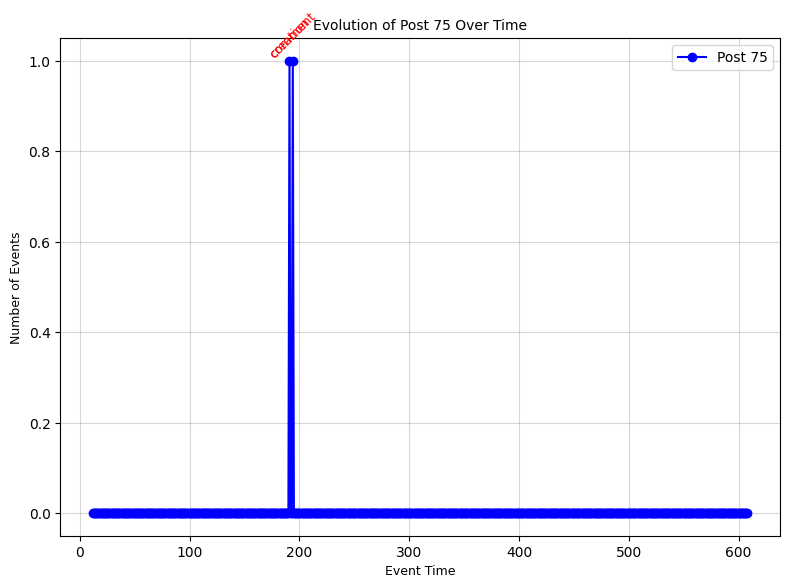

In [30]:
plot_post_evolution(75) 

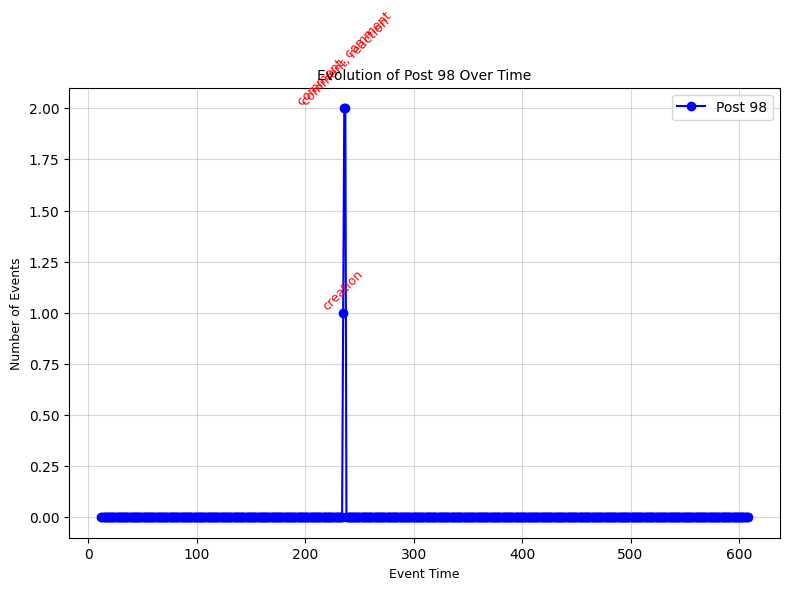

In [31]:
plot_post_evolution(98) 